[Reference](https://towardsdatascience.com/create-beautiful-architecture-diagrams-with-python-7792a1485f97)

In [1]:
!pip install diagrams

     |████████████████████████████████| 15.2MB 298kB/s 
     |████████████████████████████████| 102kB 12.5MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=89b6ffa3d446b446134eda3739e45d8fa8a91c323255cc14911f6061abd243b0
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# Step 1: Creating The Diagram Workspace

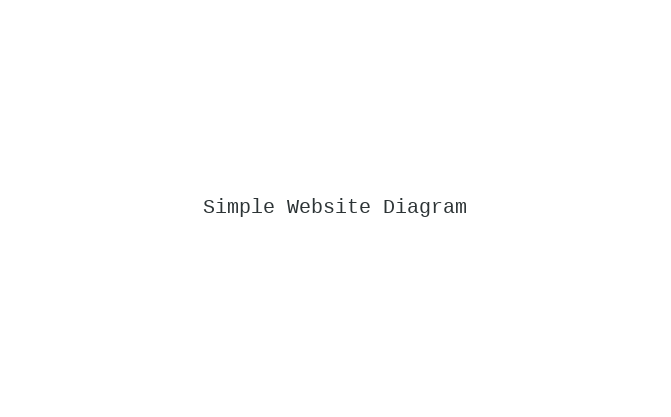

In [2]:
from diagrams import Diagram

with Diagram("Simple Website Diagram") as diag:
    pass
diag

# Step 2: Adding The Nodes

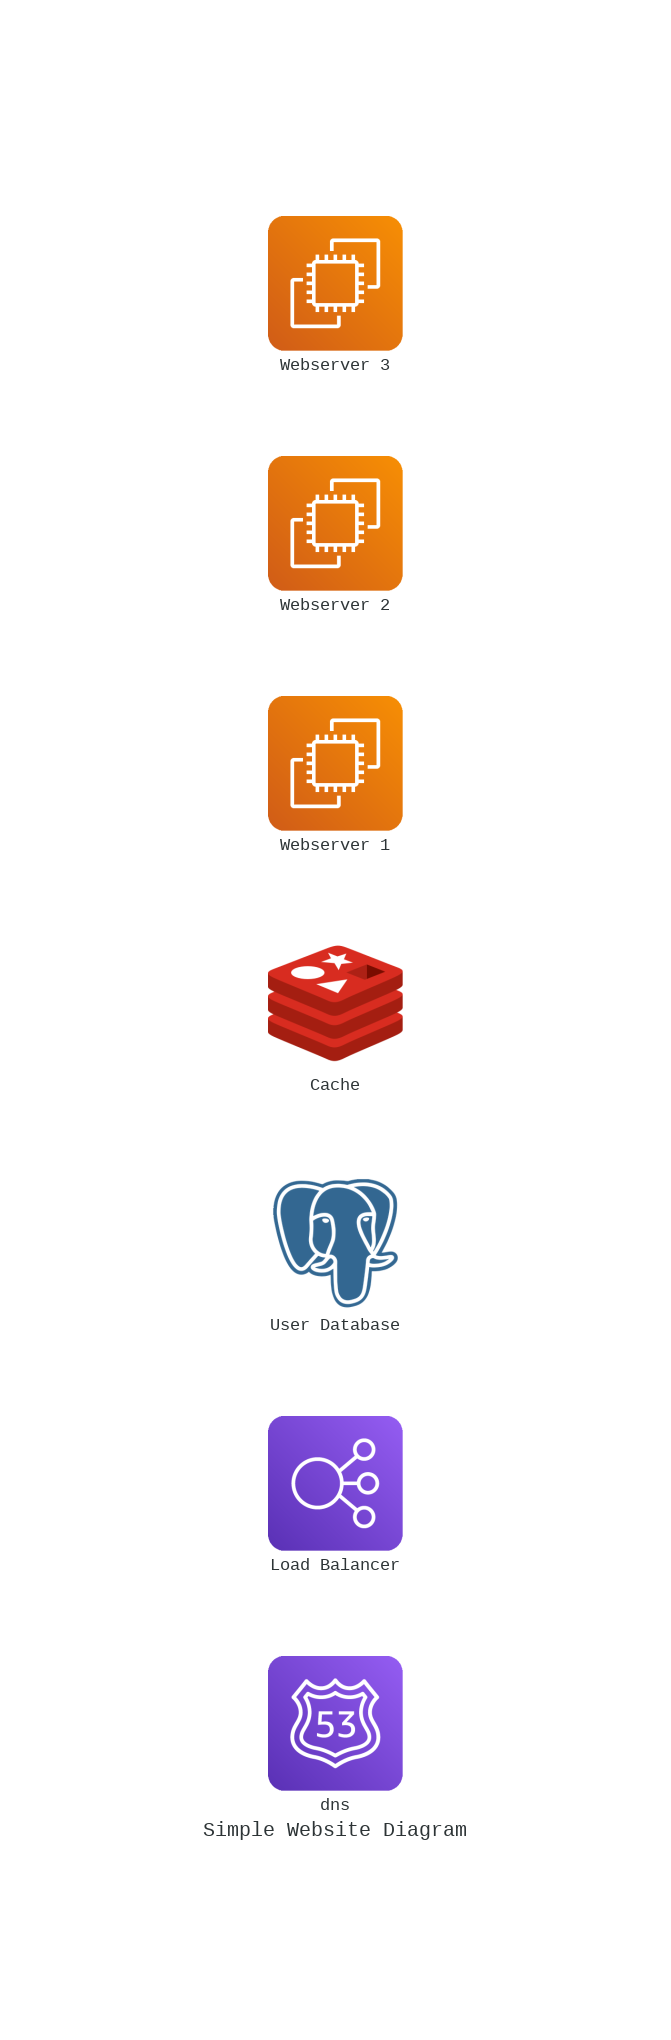

In [3]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database

with Diagram("Simple Website Diagram") as diag:
    dns = Route53("dns")
    load_balancer = ELB("Load Balancer")
    database = PostgreSQL("User Database")
    cache = Redis("Cache")
    svc_group = [EC2("Webserver 1"),
                 EC2("Webserver 2"),
                 EC2("Webserver 3")]
diag # This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.

# Step 3: Grouping The Nodes (Optional)

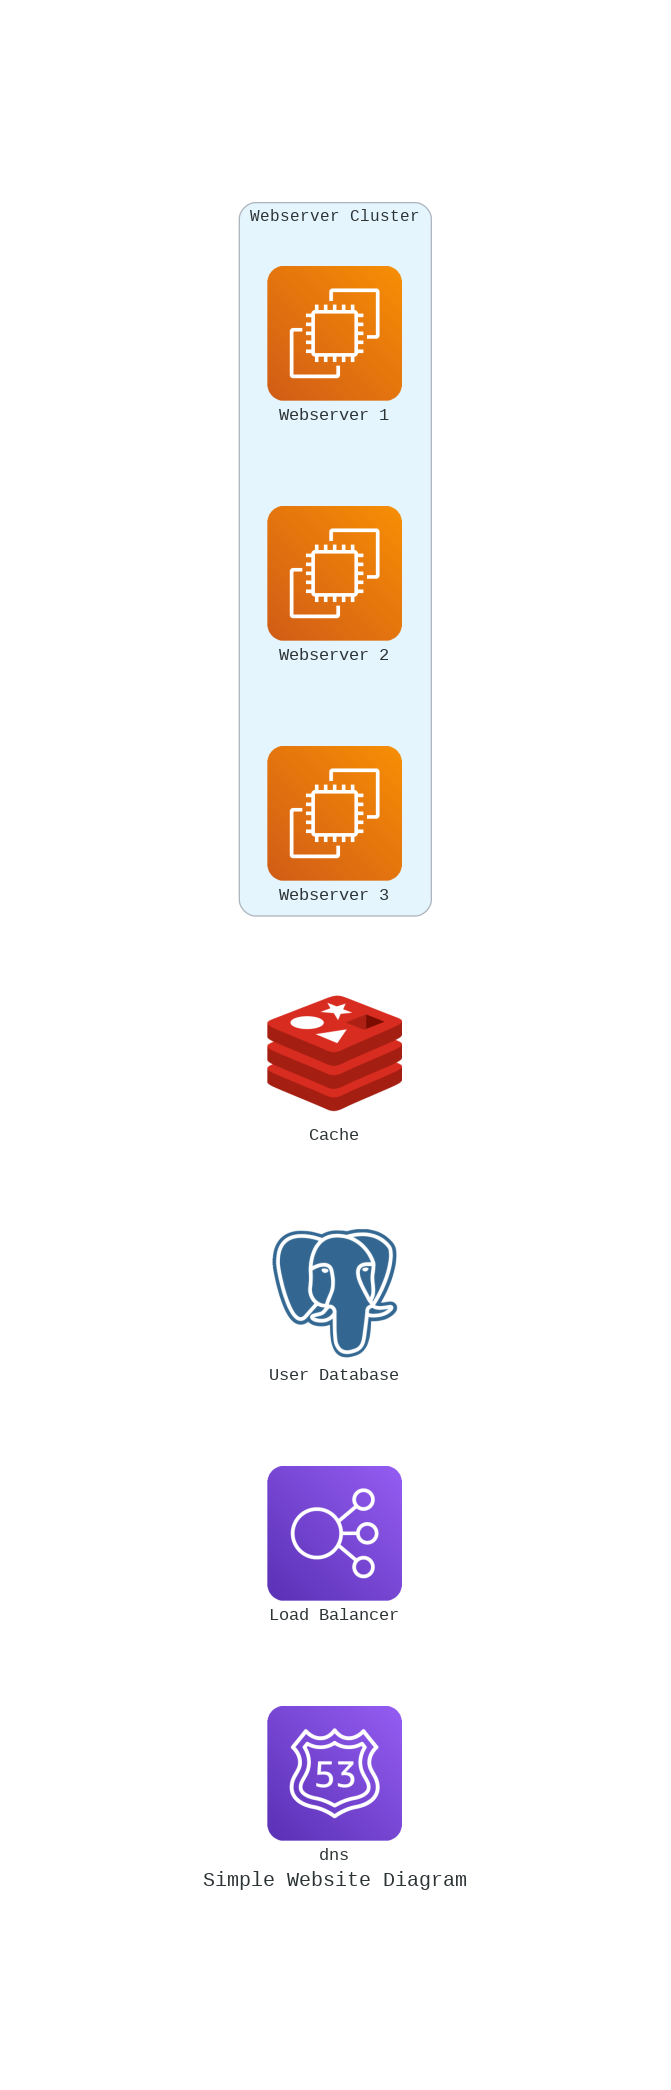

In [4]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database

with Diagram("Simple Website Diagram") as diag:
    dns = Route53("dns")
    load_balancer = ELB("Load Balancer")
    database = PostgreSQL("User Database")
    cache = Redis("Cache")
    with Cluster("Webserver Cluster"):
        svc_group = [EC2("Webserver 1"),
                    EC2("Webserver 2"),
                    EC2("Webserver 3")]
diag

# Step 4: Linking It All Together

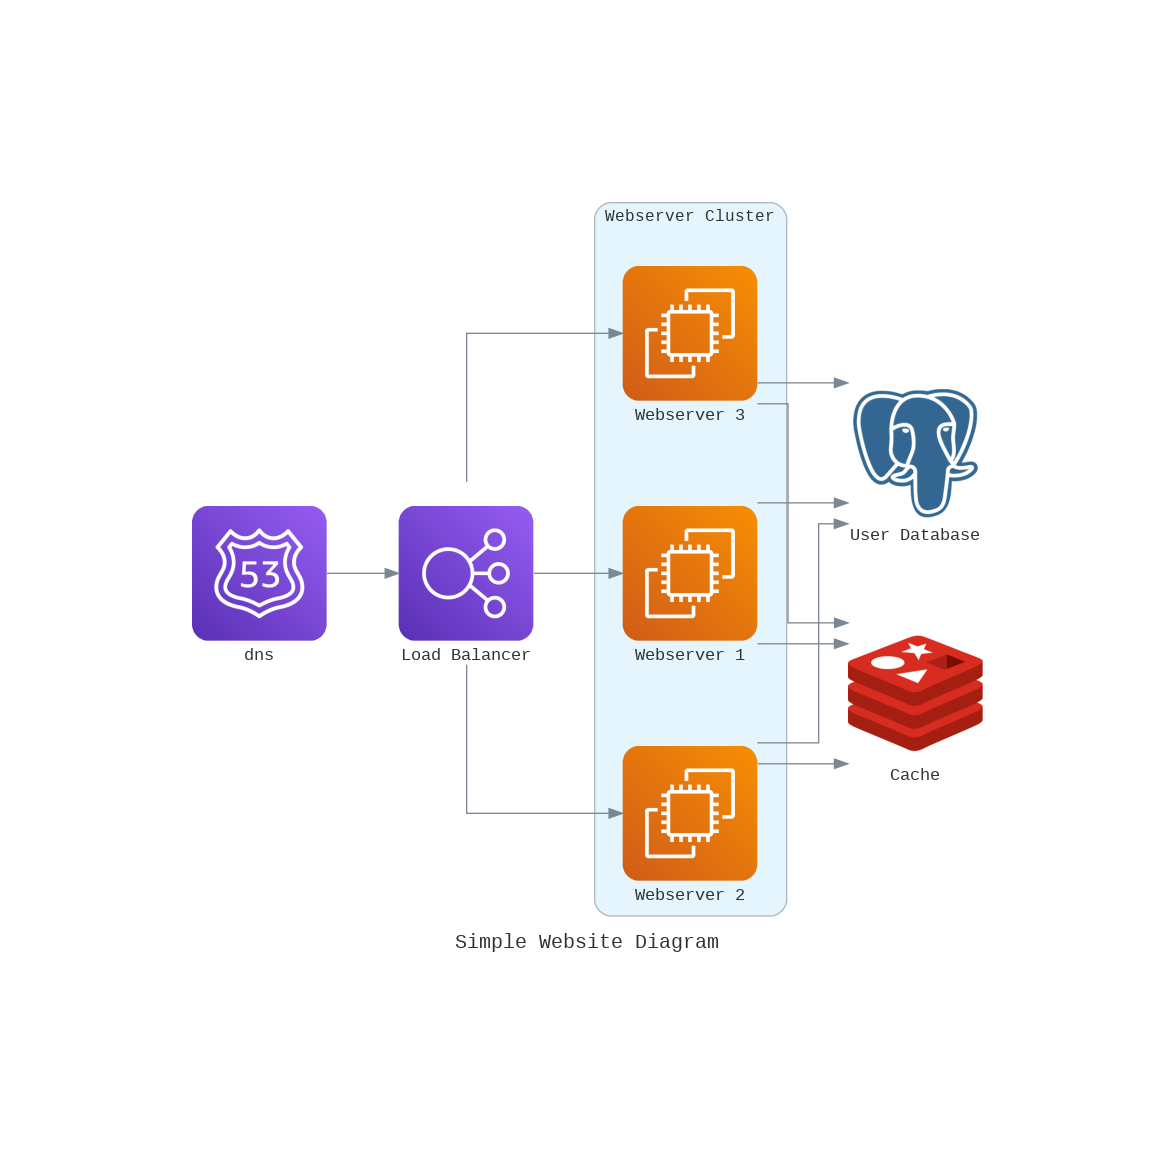

In [5]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database

with Diagram("Simple Website Diagram", direction='LR') as diag: # It's LR by default, but you have a few options with the orientation
    dns = Route53("dns")
    load_balancer = ELB("Load Balancer")
    database = PostgreSQL("User Database")
    cache = Redis("Cache")
    with Cluster("Webserver Cluster"):
        svc_group = [EC2("Webserver 1"),
                    EC2("Webserver 2"),
                    EC2("Webserver 3")]
    dns >> load_balancer >> svc_group
    svc_group >> cache
    svc_group >> database
diag